# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score , roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


#preprocessing :
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier, IsolationForest
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import time
import pickle



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


# Load Datasets

In [ ]:
# Load Full Dataset

train = pd.read_csv('drive/My Drive/ECE657A/train.csv')
test = pd.read_csv('drive/My Drive/ECE657A/testX.csv')

df_train = train.copy()
df_test = test.copy()

# Seperate ID numbers and target features from dataset

X = df_train.iloc[:, 2:]
y = df_train['Label']

df_test1 = df_test.iloc[:, 1:]

print("Original Shape of Train Dataset:", df_train.shape)
print("Original Shape of Test Dataset:", df_test.shape)

print("Shape of Train Features Data:", X.shape)
print("Shape of Train Targets:", y.shape)
print("Shape of Test Features Data:", df_test1.shape)



Original Shape of Train Dataset: (60000, 786)
Original Shape of Test Dataset: (10000, 785)
Shape of Train Features Data: (60000, 784)
Shape of Train Targets: (60000,)
Shape of Test Features Data: (10000, 784)


# Check for NaN Values

In [ ]:
# For Train

if(df_train.isnull().any().sum() == 0):
    print("No NaN Values in Train Data")

# For Test

if(df_test.isnull().any().sum() == 0):
    print("No NaN Values in Test Data")

No NaN Values in Train Data
No NaN Values in Test Data


# Plot Random Images from Dataset

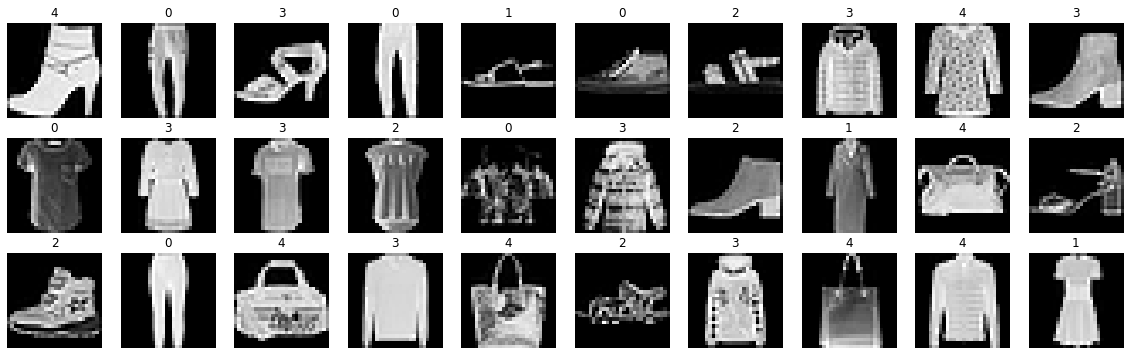

In [ ]:
fig, axes = plt.subplots(3, 10, figsize = (20, 6))

for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = train.iloc[:, 2:].values[index].reshape(28,28)
        cloths = train['Label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(cloths)
        axe.set_axis_off()

# Check Distribution of Classes

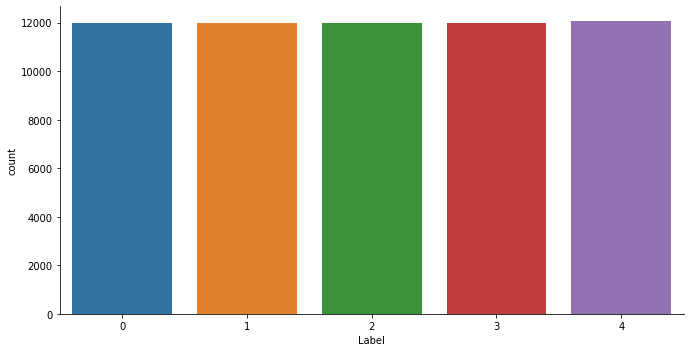

In [ ]:
sns.catplot(x='Label', data=df_train, kind='count', height=5, aspect= 1.9)

# Data Preprocessing

## Normalize the dataset

* Data samples need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we also acheive Zero Mean and Unit Variance.

* Normalization is carried out as follows: 
> x = (x - min) / (max - min) ; Here min= 0 and max= 255

In [ ]:
# Normalize Full Train and Test Feature data

X = X.astype("float32")/255

df_test1 = df_test1.astype("float32")/255

## Apply **Principal Component Analysis**

Text(0.5, 1.0, 'EVR with First 20 Components')

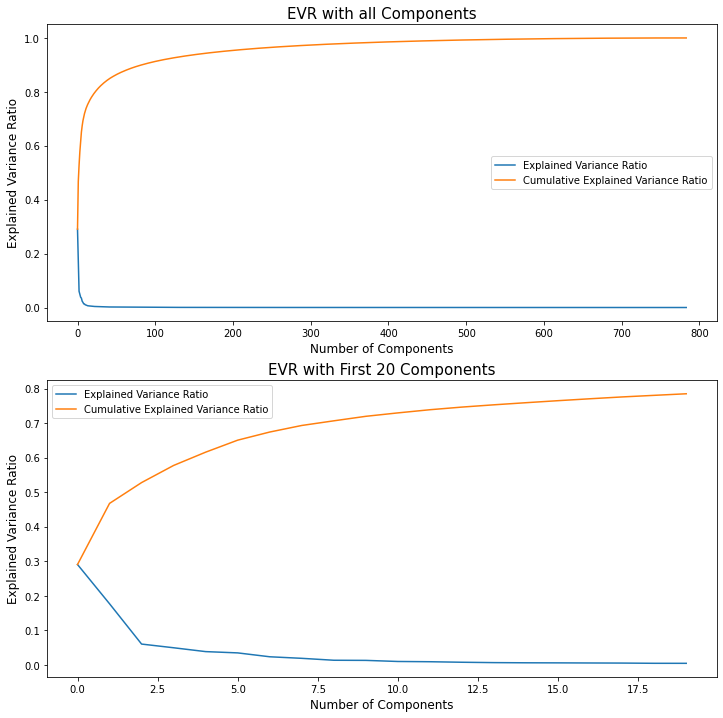

In [ ]:
# Apply PCA

pca = PCA().fit(X)

# Plot Explained Variance Ratio
evr = pca.explained_variance_ratio_

# print("The Explained Variance Ratio of First 20 Components is:\n ", evr[:20])

fig = plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(evr, label= 'Explained Variance Ratio')
plt.plot(np.cumsum(evr), label= 'Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components', fontsize= 12)
plt.ylabel('Explained Variance Ratio', fontsize= 12)
plt.legend()
plt.title("EVR with all Components", fontsize= 15)

plt.subplot(2,1,2)
plt.plot(evr[:20], label= 'Explained Variance Ratio')
plt.plot(np.cumsum(evr[:20]), label= 'Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components', fontsize= 12)
plt.ylabel('Explained Variance Ratio', fontsize= 12)
plt.legend()
plt.title("EVR with First 20 Components", fontsize= 15)


### PCA Transform the Train and Test Data

In [ ]:
# PCA Transform on whole Train and Test Data 
X_pca = pca.transform(X)
test_pca = pca.transform(df_test1)

# Select only first 15 pca components
X_pca = X_pca[:, :20]
test_pca = test_pca[:, :20]

# Convert to Dataframes
X_pca = pd.DataFrame(X_pca)
test_pca = pd.DataFrame(test_pca)

print("Shape of PCA transformed Full Train Data: " , X_pca.shape )
print("Shape of PCA transformed Test Data: " , test_pca.shape )

Shape of PCA transformed Full Train Data:  (60000, 20)
Shape of PCA transformed Test Data:  (10000, 20)


### Plot projections of obtained principal components



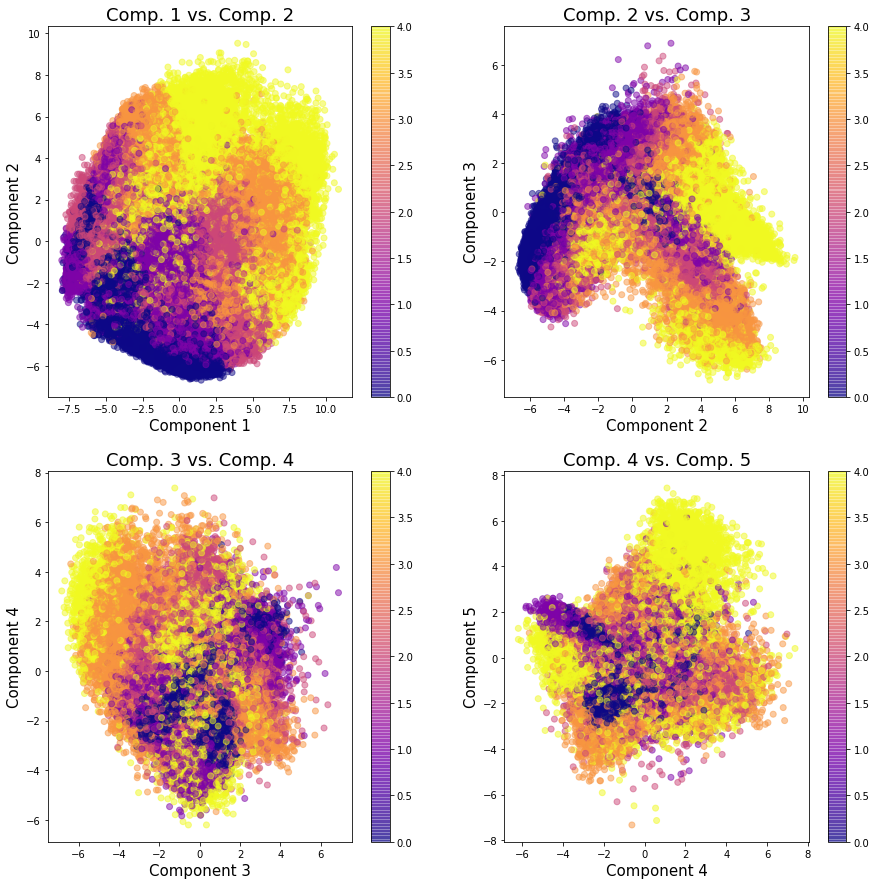

In [ ]:
# Join Targets on PCA Transformed Data for scatter plot
pca_tr = X_pca.join(y)

# Plot the ScatterPlot
fig = plt.figure(figsize = (15, 15))

for i in range(0,4):
    plt.subplot(2, 2, i+1)
    plt.scatter(pca_tr[i], pca_tr[i+1], c=pca_tr.Label, alpha=0.5, cmap = 'plasma')
    plt.xlabel('Component '+ str(i+1), fontsize = 15)
    plt.ylabel('Component ' + str(i+2), fontsize = 15)
    plt.colorbar();
    plt.title('Comp. ' + str(i+1) + ' vs. Comp. ' + str(i+2), fontsize = 18)


## Apply **Linear Discriminant Analysis**

In [ ]:

lda = LinearDiscriminantAnalysis().fit(X, y)

lda_tr = lda.transform(X)
lda_tr = pd.DataFrame(lda_tr)
lda_tr = lda_tr.join(y)



### Plot projections of obtained LDA components


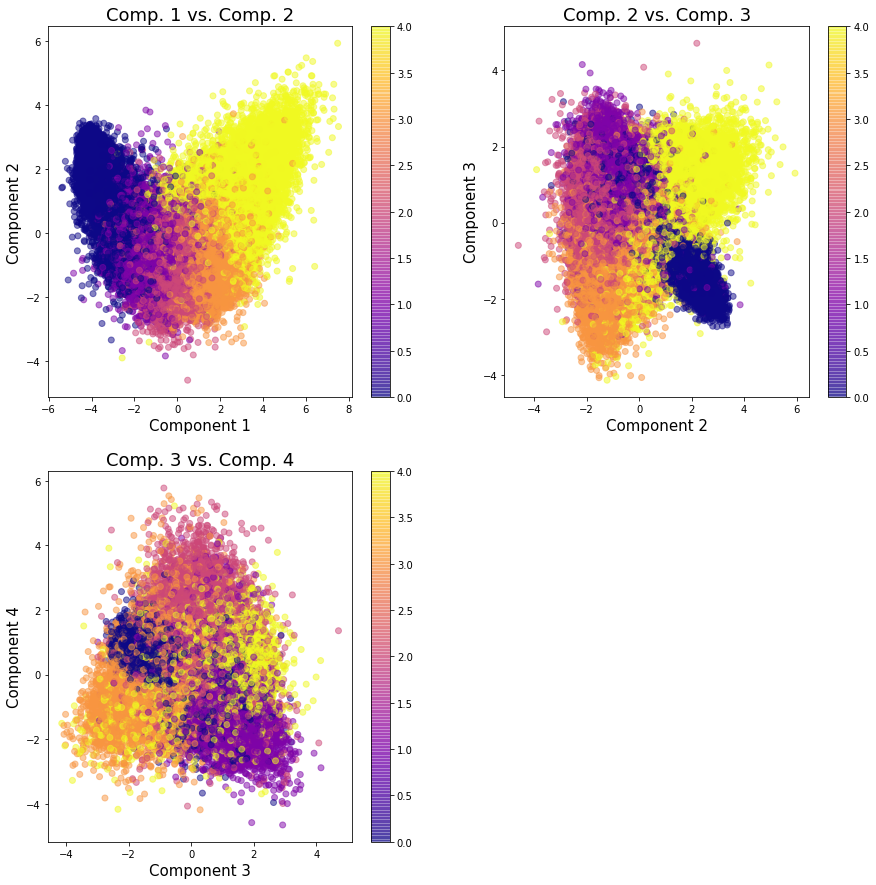

In [ ]:
fig = plt.figure(figsize = (15, 15))

for i in range(0,3):
    plt.subplot(2, 2, i+1)
    plt.scatter(lda_tr[i], lda_tr[i+1], c=lda_tr.Label, alpha=0.5, cmap = 'plasma')
    plt.xlabel('Component '+ str(i+1), fontsize = 15)
    plt.ylabel('Component ' + str(i+2), fontsize = 15)
    plt.colorbar();
    plt.title('Comp. ' + str(i+1) + ' vs. Comp. ' + str(i+2), fontsize = 18)

### Truncate the Train Data for using GridSearchCV and Apply PCA

In [ ]:
# Full Train Data

full_tr = X.copy()

trunc_tr = full_tr[0:25000]
print("Shape of Truncated Training data for using GridSearchCV is: ", trunc_tr.shape)

# Apply PCA to truncated data

print("\nApplying PCA...\n")

trunc_pca = pca.transform(trunc_tr)
trunc_pca = pd.DataFrame(trunc_pca[:,:20])

print("Shape of PCA Transformed Truncated Training data is: ", trunc_pca.shape)

trunc_y =  y[:25000]

print("Shape of Truncated Training Labels is: ", trunc_y.shape)


Shape of Truncated Training data for using GridSearchCV is:  (25000, 784)

Applying PCA...

Shape of PCA Transformed Truncated Training data is:  (25000, 20)
Shape of Truncated Training Labels is:  (25000,)


# Classification Models

## 1. Support Vector Machine Classifier

In [ ]:
# GridSearchCV for SVC

grid_param = {'C': [0.5, 1, 10, 50, 100, 150, 200]}

print("\nApplying GridSearchCV ... \n")
start = time.time()

gs_svc = GridSearchCV(estimator= SVC(kernel = 'rbf', random_state= 42), 
                      param_grid= grid_param, scoring= 'accuracy', cv= 10,)

gs_svc.fit(trunc_pca, trunc_y)

end = time.time()
print("\n Finished applying GridSearchCV ... \n")

print("Best Parameters: ", gs_svc.best_params_)
print("Best Score: ", gs_svc.best_score_)
print("GridSearchCV Runtime: ", (end-start)/60, 'mins' )


Applying GridSearchCV ... 


 Finished applying GridSearchCV ... 

Best Parameters:  {'C': 50}
Best Score:  0.8793999999999998
GridSearchCV Runtime:  17.114677592118582 mins


The best parameters obtained from GridSearchCV on SVM Classifier are **C = 50** and **kernel = RBF**

We will use these parameters to calculate crossvalidation accuracy of SVM Classifier on full Training Data of 60,000 Samples.

### Fit the SVM Model, Generate Predictions and Compute the Runtimes



In [ ]:
# Implement SVC for C=50 on Full Train Data

svm_clf = SVC(C=50, kernel='rbf', random_state=42)

print("\n Applying SVM Classifier ... \n")

start = time.time()
svm_clf.fit(X_pca, y)
end = time.time()

training = (end - start)/60

start = time.time()
svm_preds = svm_clf.predict(test_pca) 
end = time.time()

testing = (end - start)/60

print("\n Finished applying SVM Classifier ... \n")

print("SVM Classifier Training Runtime: ", training , 'mins' )
print("SVM Classifier Testing Runtime: ", testing , 'mins' )



 Applying SVM Classifier ... 


 Finished applying SVM Classifier ... 

SVM Classifier Training Runtime:  1.4904059926668802 mins
SVM Classifier Testing Runtime:  0.14467995166778563 mins


In [ ]:
# Implement SVC for C=90 on Full Train Data

svm_clf = SVC(C=90, kernel='rbf', random_state=42)

print("\n Applying SVM Classifier ... \n")

start = time.time()
svm_clf.fit(X_pca, y)
end = time.time()

training = (end - start)/60

start = time.time()
svm_preds = svm_clf.predict(test_pca) 
end = time.time()

testing = (end - start)/60

print("\n Finished applying SVM Classifier ... \n")

print("SVM Classifier Training Runtime: ", training , 'mins' )
print("SVM Classifier Testing Runtime: ", testing , 'mins' )


 Applying SVM Classifier ... 


 Finished applying SVM Classifier ... 

SVM Classifier Training Runtime:  1.8265260577201843 mins
SVM Classifier Testing Runtime:  0.14075689713160197 mins


In [ ]:
# Create submissions for SVM
subm = pd.DataFrame(test.iloc[:,0])
subm = subm.join(pd.DataFrame(data = svm_preds, columns =['Label']))
subm.to_csv('drive/My Drive/ECE657A/outs/non-cnn/svm90_out.csv', index=False)

## 2. Random Forest Classifier

In [ ]:
# GridSearchCV for SVC

grid_param = {'n_estimators': [100, 300, 500, 700, 900]}

print("\nApplying GridSearchCV ... \n")
start = time.time()

gs_rf = GridSearchCV(estimator= RandomForestClassifier(criterion='entropy', random_state= 42), 
                      param_grid= grid_param, scoring= 'accuracy', cv= 10)

gs_rf.fit(trunc_pca, trunc_y)

end = time.time()
print("\n Finished applying GridSearchCV ... \n")

print("Best Parameters: ", gs_rf.best_params_)
print("Best Score: ", gs_rf.best_score_)
print("GridSearchCV Runtime: ", (end-start)/60, 'mins' )


Applying GridSearchCV ... 


 Finished applying GridSearchCV ... 

Best Parameters:  {'n_estimators': 700}
Best Score:  0.8678799999999999
GridSearchCV Runtime:  113.01522955497106 mins


The best parameters obtained from GridSearchCV on Random Forest Classifier are **n_estimators = 700  and criterion = entropy**

We will use these parameters to calculate crossvalidation accuracy of Random Forest Classifier on full Training Data of 60,000 Samples.

### Fit the RF Model, Generate Predictions and Compute the Runtimes

In [ ]:
# Implement RF for n_estimators = 700  on Full Train Data

classifier = RandomForestClassifier(n_estimators= 700 , criterion='entropy', random_state= 42)

print("\n Applying Random Forest Classifier ... \n")

start = time.time()
classifier.fit(X_pca, y)
end = time.time()

training = (end - start)/60

start = time.time()
rf_preds = classifier.predict(test_pca) 
end = time.time()

testing = (end - start)/60

print("\n Finished applying Random Forest Classifier ... \n")

print("Random Forest Classifier Training Runtime: ", training , 'mins' )
print("Random Forest Classifier Testing Runtime: ", testing , 'mins' )



 Applying Random Forest Classifier ... 


 Finished applying Random Forest Classifier ... 

Random Forest Classifier Training Runtime:  9.628051483631134 mins
Random Forest Classifier Testing Runtime:  0.03318204879760742 mins


## 3. Gradient Boosting Classifier

In [ ]:
grid_param = {'n_estimators': [50, 100, 200]}

clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, random_state= 42)

print("\nApplying GridSearchCV ... \n")
start = time.time()

gs_gb = GridSearchCV(estimator=clf, param_grid=grid_param,
                     scoring='accuracy',  cv=10)

gs_gb.fit(trunc_pca, trunc_y)

end = time.time()
print("\n Finished applying GridSearchCV ... \n")

print("Best Parameters: ", gs_gb.best_params_)
print("Best Score: ", gs_gb.best_score_)
print("GridSearchCV Runtime: ", (end-start)/60, 'mins' )


Applying GridSearchCV ... 


 Finished applying GridSearchCV ... 

Best Parameters: {'n_estimators': 100}
Best Score: 0.83333 
GridSearchCV Runtime: 331.9773222324 mins


The best parameters obtained from GridSearchCV on Gradient Boosting Classifier are **n_estimators = 100  and criterion = entropy**

We will use these parameters to calculate crossvalidation accuracy of Gradient Boosting Classifier on full Training Data of 60,000 Samples.

### Fit the Gradient Boosting Model, Generate Predictions and Compute the Runtimes

In [ ]:
# Implement Gradient Boosting for n_estimators =  on Full Train Data

classifier = GradientBoostingClassifier(n_estimators= 100 , learning_rate=0.1, max_depth=5, random_state= 42)

print("\n Applying Gradient Boosting Classifier ... \n")

start = time.time()
classifier.fit(X_pca, y)
end = time.time()

training = (end - start)/60

start = time.time()
gb_preds = classifier.predict(test_pca) 
end = time.time()

testing = (end - start)/60

print("\n Finished applying Gradient Boosting Classifier ... \n")

print("Gradient Boosting Classifier Training Runtime: ", training , 'mins' )
print("Gradient Boosting Classifier Testing Runtime: ", testing , 'mins' )



 Applying Gradient Boosting Classifier ... 


 Finished applying Gradient Boosting Classifier ... 

Gradient Boosting Classifier Training Runtime:  8.420279463132223 mins
Gradient Boosting Classifier Testing Runtime:  0.0025332371393839517 mins


## 4. Ensemble Methods

## a. Boosting Classifier - AdaBoost

In [ ]:
cart = RandomForestClassifier(n_estimators=550, criterion= 'entropy', random_state=42)

grid_param = {'n_estimators': [5, 10, 50, 100, 150, 200]}
              
classifier = AdaBoostClassifier(base_estimator=cart, learning_rate= 0.1, random_state=42)

print("\n Applying GridSearchCV ... \n")
start = time.time()

gs_boo = GridSearchCV(estimator= classifier, param_grid= grid_param,
                     scoring='accuracy', cv=10)

gs_boo.fit(trunc_pca, trunc_y)

end = time.time()
print("\n Finished applying GridSearchCV ... \n")

print("Best Parameters: ", gs_boo.best_params_)
print("Best Score: ", gs_boo.best_score_)
print("GridSearchCV Runtime: ", (end-start)/60, 'mins' )


 Applying GridSearchCV ... 


 Finished applying GridSearchCV ... 

Best Parameters: {'n_estimators': 100}
Best Score: 0.8537833333333333 
GridSearchCV Runtime: 62.36754244515556 mins 


The best parameters obtained from GridSearchCV on AdaBoost Classifier are **n_estimators = 100**

We will use these parameters to calculate crossvalidation accuracy of AdaBoost Classifier on full Training Data of 60,000 Samples.

### Fit the AdaBoost Model, Generate Predictions and Compute the Runtimes

In [ ]:
cart = RandomForestClassifier(n_estimators=550, criterion= 'entropy', random_state=42)

classifier = AdaBoostClassifier(base_estimator=cart, n_estimators=100, learning_rate=0.1, random_state=42)

print("\n Applying AdaBoost Classifier ... \n")

start = time.time()
classifier.fit(X_pca, y)
end = time.time()

training = (end - start)/60

start = time.time()
ab_preds = classifier.predict(test_pca) 
end = time.time()

testing = (end - start)/60

print("\n Finished applying AdaBoost Classifier ... \n")

print("AdaBoost Classifier Training Runtime: ", training , 'mins' )
print("AdaBoost Classifier Testing Runtime: ", testing , 'mins' )



 Applying AdaBoost Classifier ... 


 Finished applying AdaBoost Classifier ... 

AdaBoost Classifier Training Runtime:  7.868717245260874 mins
AdaBoost Classifier Testing Runtime:  0.02678037484486898 mins


## b. Stacking Classifier



*   Stacking uses multiple individual estimators and a final "***meta-estimator***" to compute its predictions.
*   In our Stacking Classifier implementation, we will not use GridSearchCV to find the best parameters for all individual estimators.
*   Instead, we will use our obtained values of best parameters in the previous methods to use them in our Stacking Classifier.



In [ ]:
# Implement Stacking on Full Train Data

clf1 = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)
clf2 = RandomForestClassifier(n_estimators=700, random_state=42, criterion='entropy')
clf3 = SVC(kernel = 'rbf', C=50, random_state= 42)
clf4 = ExtraTreesClassifier(n_estimators=550, criterion='entropy', random_state=42)

est = [('xgb', clf1), ('svc', clf3), ('ext', clf4)]

classifier = StackingClassifier(estimators= est, final_estimator= clf2)

print("\n Applying Stacking Classifier ... \n")
start = time.time()

scores = cross_val_score(classifier, X_pca, y, cv=10, scoring= 'accuracy')

end = time.time()
print("\n Finished applying Stacking Classifier ... \n")

print("Mean Scores: ", scores.mean())
print("Stacking Classifier Runtime: ", (end-start)/60, 'mins' )


 Applying Stacking Classifier ... 


 Finished applying Stacking Classifier ... 

Mean Scores: 0.8707923343334
Stacking Classifier Runtime: 612.3227504666667 mins


### Fit the Stacking Model, Generate Predictions and Compute the Runtimes

In [ ]:
clf1 = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)
clf2 = RandomForestClassifier(n_estimators=700, random_state=42, criterion='entropy')
clf3 = SVC(kernel = 'rbf', C=50, random_state= 42)
clf4 = ExtraTreesClassifier(n_estimators=500, criterion='entropy', random_state=42)

estimators = [('xgb', clf1), ('svc', clf3), ('ext', clf4)]

clf = StackingClassifier(estimators=estimators, final_estimator= clf2)

print("\n Applying Stacking Classifier ... \n")

start = time.time()
clf.fit(X_pca, y)
end = time.time()

training = (end - start)/60

start = time.time()
st_preds = clf.predict(test_pca) 
end = time.time()

testing = (end - start)/60

print("\n Finished applying Stacking Classifier ... \n")

print("Stacking Classifier Training Runtime: ", training , 'mins' )
print("Stacking Classifier Testing Runtime: ", testing , 'mins' )


 Applying Stacking Classifier ... 


 Finished applying Stacking Classifier ... 

Stacking Classifier Training Runtime: 119.86577448447545 mins 
Stacking Classifier Testing Runtime: 0.4551268219947815 mins


## c. Voting Classifier



*   Voting Classifier uses a voting or a majority rule for generating predictions.


*   Similar to Stacking Classifier, we will not be using GridSearchCV to find the best parameters for all individual estimators and perform subsequent voting.

*   We will use our obtained values of best parameters in the previous methods and use them in our Voting Classifier.


In [ ]:
# Implement Voting on Full Train Data

clf1 = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)
clf2 = RandomForestClassifier(n_estimators=700, random_state=42, criterion='entropy')
clf3 = SVC(kernel = 'rbf', C=50, random_state= 42)
clf4 = ExtraTreesClassifier(n_estimators=550, criterion='entropy', random_state=42)
clf5 = DecisionTreeClassifier(max_depth= 100, criterion='entropy', random_state=42)

est = [('xgb', clf1), ('rf', clf2), ('svc', clf3), ('ext', clf4), ('dt', clf5)]

classifier = VotingClassifier(estimators= est, voting='hard', flatten_transform=True, weights= [1,1,1,1,1])

print("\n Applying Voting Classifier ... \n")
start = time.time()

scores = cross_val_score(classifier, X_pca, y, cv=10, scoring= 'accuracy')

end = time.time()
print("\n Finished applying Voting Classifier ... \n")

print("Mean Scores: ", scores.mean())
print("Voting Classifier Runtime: ", (end-start)/60, 'mins' )


 Applying Voting Classifier ... 


 Finished applying Voting Classifier ... 

Mean Scores:  0.8916833333333333
Voting Classifier Runtime:  299.17198136250175 mins


### Fit the Voting Model, Generate Predictions and Compute the Runtimes

In [ ]:
clf1 = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)
clf2 = RandomForestClassifier(n_estimators=700, random_state=42, criterion='entropy')
clf3 = SVC(kernel = 'rbf', C=50, random_state= 42)
clf4 = ExtraTreesClassifier(n_estimators=550, criterion='entropy', random_state=42)
clf5 = DecisionTreeClassifier(max_depth= 100, criterion='entropy', random_state=42)

est = [('xgb', clf1), ('rf', clf2), ('svc', clf3), ('ext', clf4), ('dt', clf5)]

classifier = VotingClassifier(estimators= est, voting='hard', flatten_transform=True, weights= [1,1,1,1,1])

start = time.time()
classifier.fit(X_pca, y)
end = time.time()

training = (end - start)/60

start = time.time()
v_preds = classifier.predict(test_pca) 
end = time.time()

testing = (end - start)/60

print("Voting Classifier Training Runtime: ", training , 'mins' )
print("Voting Classifier Testing Runtime: ", testing , 'mins' )

Voting Classifier Training Runtime:  30.60490532318751 mins
Voting Classifier Testing Runtime:  0.35651248693466187 mins


### Generate a .csv of predictions

In [ ]:
subm = pd.DataFrame(test.iloc[:,0])
subm = subm.join(pd.DataFrame(data = v_preds, columns =['Label']))
subm.to_csv('drive/My Drive/ECE657A/outs/non-cnn/voting_out.csv', index=False)

## 5. XGBoost Classifier



*  XGBoost is an implementation of gradient boosted decision trees designed for Higher speed and performance.
*  We will use the best parameters as obtained in Gradient Boosting Classifier as our parameters for performing XGBoost Classification.



In [ ]:
# Implement XGBoost for n_estimators = 550  on Full Train Data

classifier = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)

print("\n Applying XGBoost Classifier ... \n")
start = time.time()

scores = cross_val_score(classifier, X_pca, y, cv=10, scoring= 'accuracy')

end = time.time()
print("\n Finished applying XGBoost Classifier ... \n")

print("Mean Scores: ", scores.mean())
print("XGBoost Classifier Runtime: ", (end-start)/60, 'mins' )


 Applying XGBoost Classifier ... 


 Finished applying XGBoost Classifier ... 

Mean Scores:  0.8907333333333334
XGBoost Classifier Runtime:  188.60222372611364 mins


### Fit the XGBoost Model, Generate Predictions and Compute the Runtimes

In [ ]:
classifier = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)

start = time.time()
classifier.fit(X_pca, y)
end = time.time()

training = (end - start)/60

start = time.time()
XGB_preds = classifier.predict(test_pca) 
end = time.time()

testing = (end - start)/60

print("XGBoost Classifier Training Runtime: ", training , 'mins' )
print("XGBoost Classifier Testing Runtime: ", testing , 'mins' )

XGBoost Classifier Training Runtime:  20.00407206217448 mins
XGBoost Classifier Testing Runtime:  0.13663982152938842 mins


In [ ]:
subm = pd.DataFrame(test.iloc[:,0])
subm = subm.join(pd.DataFrame(data = XGB_preds, columns =['Label']))
subm.to_csv('drive/My Drive/ECE657A/outs/non-cnn/xgb_out.csv', index=False)

# ROC Curve Analysis

## Using SVM CLassifier

In [ ]:
# FOR C = 50 AND KERNEL = RBF
y = label_binarize(y, classes=[0,1,2,3,4])
n_classes = 5

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# classifier
svm_clf = SVC(C=50, kernel= 'rbf', random_state=42)

clf = OneVsRestClassifier(svm_clf)

y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


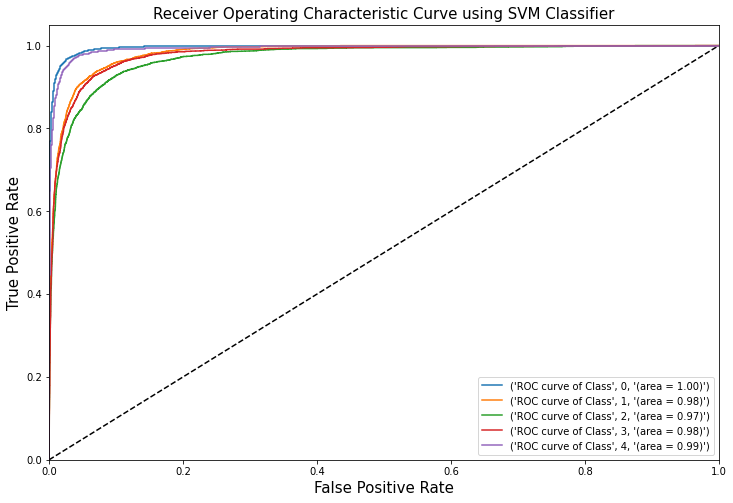

In [ ]:
# Plot of a ROC curve for a specific class
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'k--')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=('ROC curve of Class', i , '(area = %0.2f)' % roc_auc[i]))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic Curve using SVM Classifier', fontsize=15)
plt.legend(loc="lower right")
plt.show()

In [ ]:
# FOR C = 1 and KERNEL = LINEAR

y = label_binarize(y, classes=[0,1,2,3,4])
n_classes = 5

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# classifier
svm_clf = SVC(C=1, kernel= 'linear', random_state=42)

clf = OneVsRestClassifier(svm_clf)

y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

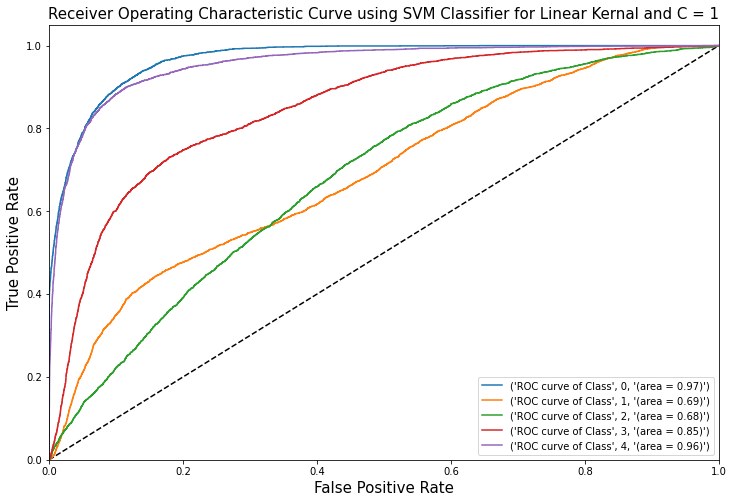

In [ ]:
# Plot of a ROC curve for a specific class
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'k--')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=('ROC curve of Class', i , '(area = %0.2f)' % roc_auc[i]))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic Curve using SVM Classifier for Linear Kernal and C = 1', fontsize=15)
plt.legend(loc="lower right")
plt.show()

# Evaluation With Other Metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 20)
(12000, 20)
(48000,)
(12000,)


## For SVM Classifier

In [ ]:
# Implement SVC for C=50 on Full Train Data

svm_clf = SVC(C=50, kernel='rbf', random_state=42)

print("\n Applying SVM Classifier ... \n")

svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test) 

print(" Finished applying SVM Classifier ... \n")

targets = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(y_test, svm_preds, target_names= targets))


 Applying SVM Classifier ... 

 Finished applying SVM Classifier ... 

              precision    recall  f1-score   support

     Class 0       0.94      0.96      0.95      2379
     Class 1       0.87      0.88      0.87      2424
     Class 2       0.84      0.83      0.84      2364
     Class 3       0.87      0.86      0.86      2367
     Class 4       0.93      0.93      0.93      2466

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



## For Voting Classifier

In [ ]:
clf1 = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)
clf2 = RandomForestClassifier(n_estimators=700, random_state=42, criterion='entropy')
clf3 = SVC(kernel = 'rbf', C=50, random_state= 42)
clf4 = ExtraTreesClassifier(n_estimators=550, criterion='entropy', random_state=42)
clf5 = DecisionTreeClassifier(max_depth= 100, criterion='entropy', random_state=42)

est = [('xgb', clf1), ('rf', clf2), ('svc', clf3), ('ext', clf4), ('dt', clf5)]

voting = VotingClassifier(estimators= est, voting='hard', flatten_transform=True, weights= [1,1,1,1,1])

print("\n Applying Voting Classifier ... \n")

voting.fit(X_train, y_train)
v_preds = voting.predict(X_test)

print("Finished applying Voting Classifier ... \n")


targets = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(y_test, v_preds, target_names= targets))



 Applying Voting Classifier ... 

Finished applying Voting Classifier ... 

              precision    recall  f1-score   support

     Class 0       0.94      0.95      0.94      2379
     Class 1       0.87      0.88      0.88      2424
     Class 2       0.84      0.83      0.84      2364
     Class 3       0.88      0.87      0.87      2367
     Class 4       0.93      0.93      0.93      2466

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



## For Gradient Boosting  Classifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators= 100 , learning_rate=0.1, max_depth=5, random_state= 42)

print("\n Applying Gradient Boosting Classifier ... \n")

gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test) 

print("Finished applying Gradient Boosting Classifier ... \n")


targets = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(y_test, gb_preds, target_names= targets))



 Applying Gradient Boosting Classifier ... 

Finished applying Gradient Boosting Classifier ... 

              precision    recall  f1-score   support

     Class 0       0.92      0.94      0.93      2379
     Class 1       0.84      0.84      0.84      2424
     Class 2       0.79      0.80      0.79      2364
     Class 3       0.84      0.83      0.83      2367
     Class 4       0.92      0.90      0.91      2466

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

